In [1]:
# This required pip install opencv-contrib-python
# https://mecaruco2.readthedocs.io/en/latest/notebooks_rst/Aruco/aruco_basics.html#marker-creation

In [2]:
import numpy as np
import cv2, PIL
from cv2 import aruco
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
%matplotlib nbagg


In [22]:
print(a*2)
# https://docs.opencv.org/2.4/modules/calib3d/doc/camera_calibration_and_3d_reconstruction.html

19982


In [21]:
a = 9991

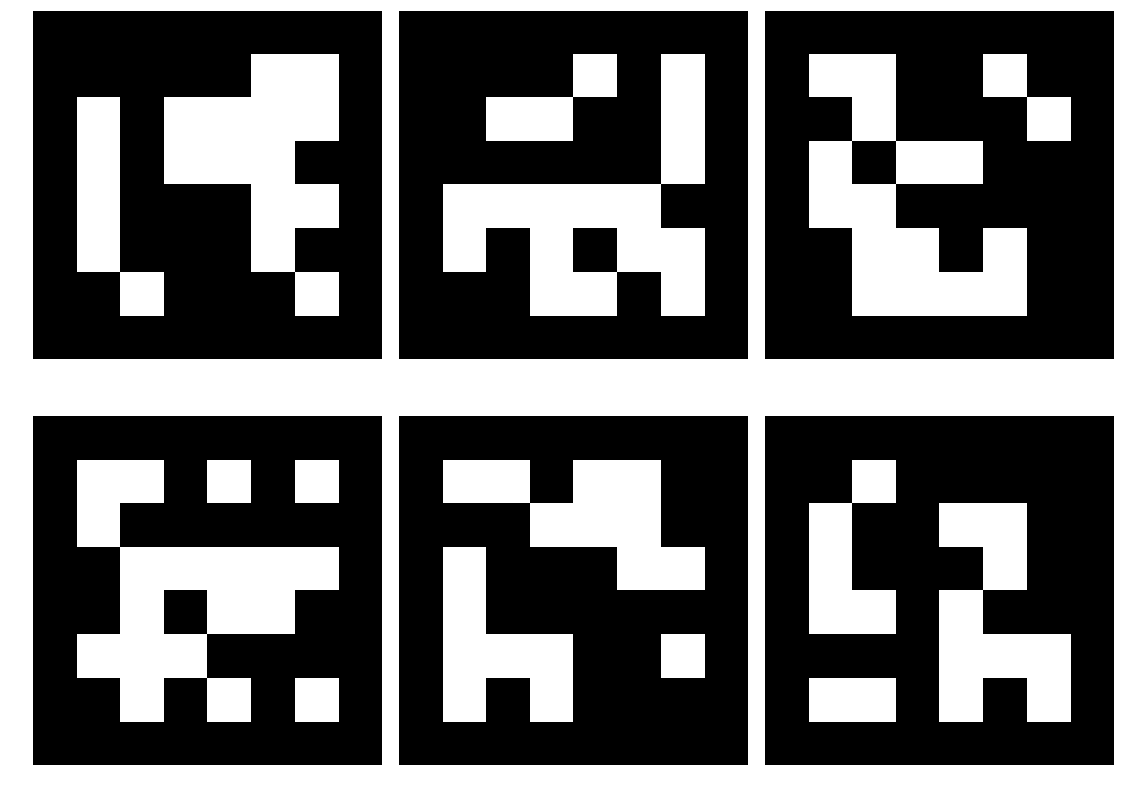

In [14]:
aruco_dict = aruco.Dictionary_get(aruco.DICT_6X6_250)

fig = plt.figure(figsize=(15,11))
nx = 3
ny = 2
for i in range(1, nx*ny+1):
    ax = fig.add_subplot(ny, nx, i)
    img = aruco.drawMarker(aruco_dict, i, 700)
    plt.imshow(img, cmap = mpl.cm.gray, interpolation = "nearest")
    ax.axis("off")
plt.subplots_adjust(0,0,1,1,0.05,0.05)

plt.savefig("arucomarkers.png")
plt.show()


In [1]:
import cv2, numpy

video_file = "/home/julian/Videos/arucotags.MP4"
video_file = "/home/julian/Videos/avianskullchessboard.MOV"
video_file = "/home/julian/data/hanglog/20190627112751-mamtortim/13370001.MOV"

h, w = 0, 0

cap = cv2.VideoCapture(video_file)
interleave = cap.get(cv2.CAP_PROP_FRAME_COUNT) // 19



In [2]:
pos_frame = cap.get(cv2.CAP_PROP_POS_FRAMES)
nextframe = 0
frames = [ ]
while cap.get(cv2.CAP_PROP_POS_FRAMES) < cap.get(cv2.CAP_PROP_FRAME_COUNT):
    flag, frame = cap.read()
    # The frame is ready and already captured
    pos_frame = cap.get(cv2.CAP_PROP_POS_FRAMES)
    if pos_frame >= nextframe:
        cv2.waitKey(10)  # necessary for the cv2.imshow() to work
        print("frame: ", pos_frame)
        h, w = frame.shape[:2]
        nextframe += interleave
        frames.append(frame)
len(frames)

frame:  1.0
frame:  3480.0
frame:  6960.0
frame:  10440.0
frame:  13920.0
frame:  17400.0
frame:  20880.0
frame:  24360.0
frame:  27840.0
frame:  31320.0
frame:  34800.0
frame:  38280.0
frame:  41760.0
frame:  45240.0
frame:  48720.0
frame:  52200.0
frame:  55680.0
frame:  59160.0
frame:  62640.0
frame:  66120.0


20

In [3]:
mtx, dist = (numpy.array([[505.60889582,   0.        , 606.56640502],
        [  0.        , 503.67255399, 362.81063569],
        [  0.        ,   0.        ,   1.        ]]),
 numpy.array([[-0.23212079,  0.06113066, -0.00184422,  0.00058345, -0.00765453]]))

mtx, dist = (numpy.array([[9.90618474e+02, 0.00000000e+00, 6.53572956e+02],
        [0.00000000e+00, 1.00755969e+03, 3.67872669e+02],
        [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]]),
 numpy.array([[-0.57453909,  0.42458431, -0.01814159, -0.00694322, -0.17175265]]))



In [6]:
corners, ids

([array([[[562., 254.],
          [562., 204.],
          [606., 203.],
          [606., 254.]]], dtype=float32), array([[[916., 164.],
          [910., 215.],
          [854., 206.],
          [861., 154.]]], dtype=float32)], array([[4],
        [1]], dtype=int32))

[array([[[578., 341.],
        [567., 292.],
        [609., 281.],
        [621., 331.]]], dtype=float32), array([[[896., 165.],
        [904., 216.],
        [849., 222.],
        [842., 170.]]], dtype=float32)]
[[4]
 [1]]


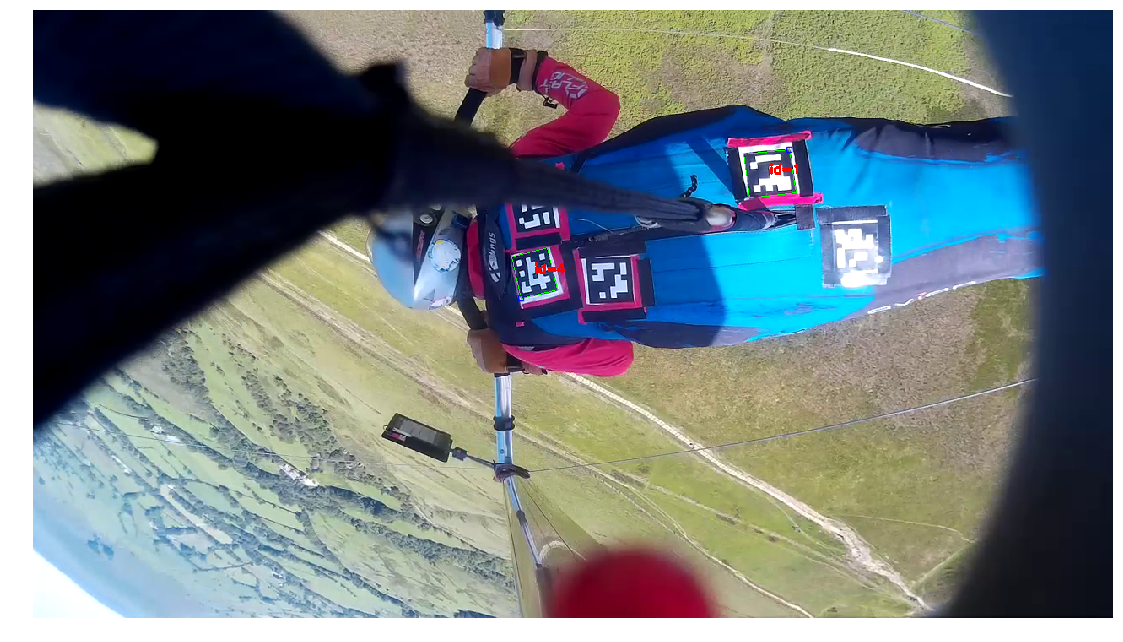

In [17]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(15,16))
iframes = [15, 16, 17, 18]
iframes = [14]

aruco_dict = cv2.aruco.Dictionary_get(cv2.aruco.DICT_6X6_250)
parameters =  cv2.aruco.DetectorParameters_create()

for i in range(len(iframes)):
    frame = frames[iframes[i]]
    fframe = cv2.undistort(frame, mtx, dist, None, mtx)
    fframe = frame
    ax = plt.subplot(len(iframes), 1, i+1)
    
    gray = cv2.cvtColor(fframe, cv2.COLOR_BGR2GRAY)
    #corners, ids, rejectedImgPoints = cv2.aruco.detectMarkers(gray, aruco_dict, parameters=parameters, cameraMatrix, distCoeff)
    corners, ids, rejectedImgPoints = cv2.aruco.detectMarkers(gray, aruco_dict, parameters=parameters, cameraMatrix=mtx, distCoeff=dist)
    frame_markers = cv2.aruco.drawDetectedMarkers(cv2.cvtColor(fframe, cv2.COLOR_BGR2RGB), corners, ids)
    print(corners)
    print(ids)
    plt.imshow(frame_markers)
    
    ax.axis("off")
plt.subplots_adjust(0,0,1,1,0.05,0.05)
#plt.savefig("ff.png")

In [15]:
cv2.aruco.detectMarkers?

[array([[[578., 341.],
        [567., 292.],
        [609., 281.],
        [621., 331.]]], dtype=float32), array([[[896., 165.],
        [904., 216.],
        [849., 222.],
        [842., 170.]]], dtype=float32)]


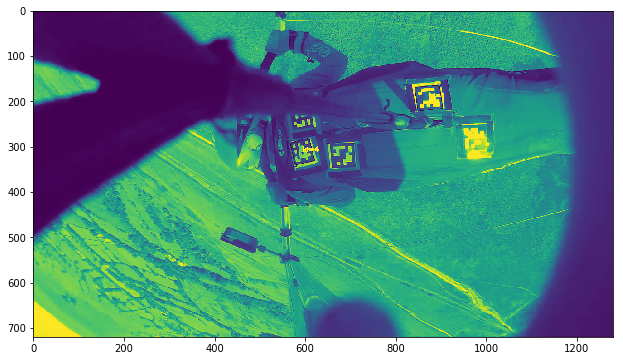

In [19]:
gray = cv2.cvtColor(fframe, cv2.COLOR_BGR2GRAY)
aruco_dict = cv2.aruco.Dictionary_get(cv2.aruco.DICT_6X6_250)
parameters =  cv2.aruco.DetectorParameters_create()
#fframe = cv2.undistort(frame, mtx, dist, None, mtx)
fframe = frame
#corners, ids, rejectedImgPoints = cv2.aruco.detectMarkers(gray, aruco_dict, parameters=parameters, cameraMatrix=mtx, distCoeff=dist)
corners, ids, rejectedImgPoints = cv2.aruco.detectMarkers(gray, aruco_dict, parameters=parameters)
frame_markers = cv2.aruco.drawDetectedMarkers(gray.copy(), corners, ids)
plt.figure(figsize=(15,6))
plt.imshow(frame_markers)
print(corners)

[array([[[578., 341.],
        [567., 292.],
        [609., 281.],
        [621., 331.]]], dtype=float32), array([[[896., 165.],
        [904., 216.],
        [849., 222.],
        [842., 170.]]], dtype=float32)]
[[4]
 [1]]


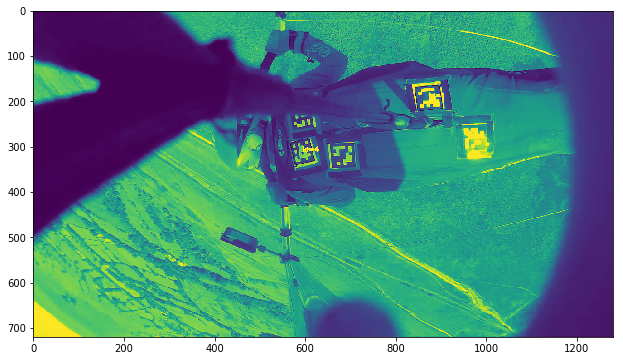

In [29]:
aruco_dict = cv2.aruco.Dictionary_get(cv2.aruco.DICT_6X6_250)
parameters =  cv2.aruco.DetectorParameters_create()
fframe = cv2.undistort(frame, mtx, dist, None, mtx)
fframe = frame
gray = cv2.cvtColor(fframe, cv2.COLOR_BGR2GRAY)
corners, ids, rejectedImgPoints = cv2.aruco.detectMarkers(gray, aruco_dict, parameters=parameters, cameraMatrix=mtx, distCoeff=dist)
#corners, ids, rejectedImgPoints = cv2.aruco.detectMarkers(gray, aruco_dict, parameters=parameters)
frame_markers = cv2.aruco.drawDetectedMarkers(gray.copy(), corners, ids)
plt.figure(figsize=(15,6))
plt.imshow(frame_markers)
print(corners)
print(ids)

In [17]:
from hacktrack import videos frameselectinteractive, extractledflashframes
cap = cv2.VideoCapture("/home/julian/data/hanglog/20190627112751-mamtortim/13370001.MOV")
frameselectinteractive(cap)


Output(layout=Layout(height='400px'))